<a href="https://colab.research.google.com/github/cheung0/Predicting-Air-Quality/blob/main/Alameda_County_Air_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd

# Replace 'file_path' with the actual path to your CSV file
file_path = '/daily_aqi_by_county_2022.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


  State Name county Name  State Code  County Code        Date  AQI Category  \
0    Alabama     Baldwin           1            3  2022-01-02   22     Good   
1    Alabama     Baldwin           1            3  2022-01-05   36     Good   
2    Alabama     Baldwin           1            3  2022-01-08   35     Good   
3    Alabama     Baldwin           1            3  2022-01-11   15     Good   
4    Alabama     Baldwin           1            3  2022-01-14   48     Good   

  Defining Parameter Defining Site  Number of Sites Reporting  
0              PM2.5   01-003-0010                          1  
1              PM2.5   01-003-0010                          1  
2              PM2.5   01-003-0010                          1  
3              PM2.5   01-003-0010                          1  
4              PM2.5   01-003-0010                          1  


In [35]:
# Filter the DataFrame to keep rows with county name equal to "Alameda"
df = df[df['county Name'] == 'Alameda']

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the day of the week
df['DayOfWeek'] = df['Date'].dt.day_name()

# Display the resulting DataFrame
print(df)

# Delete outliers
# Define the column containing the data to check for outliers
column_name = 'AQI'

# Calculate the Z-score for each data point in the column
z_scores = np.abs((df[column_name] - df[column_name].mean()) / df[column_name].std())

# Set the threshold for identifying outliers (e.g., Z-score greater than 3)
z_score_threshold = 3

# Filter the DataFrame to keep only rows without outliers
df = df[z_scores <= z_score_threshold]

# Display the DataFrame without outliers
print(df)

      State Name county Name  State Code  County Code       Date  AQI  \
8486  California     Alameda           6            1 2022-01-01   53   
8487  California     Alameda           6            1 2022-01-02   55   
8488  California     Alameda           6            1 2022-01-03   32   
8489  California     Alameda           6            1 2022-01-04   30   
8490  California     Alameda           6            1 2022-01-05   29   
...          ...         ...         ...          ...        ...  ...   
8725  California     Alameda           6            1 2022-08-28   57   
8726  California     Alameda           6            1 2022-08-29   53   
8727  California     Alameda           6            1 2022-08-30   59   
8728  California     Alameda           6            1 2022-08-31   61   
8729  California     Alameda           6            1 2022-09-01    6   

      Category Defining Parameter Defining Site  Number of Sites Reporting  \
8486  Moderate              PM2.5   06-001-00

<ipython-input-35-6c2f3edd4381>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-35-6c2f3edd4381>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'] = df['Date'].dt.day_name()


In [36]:
df.describe()

,State Code,County Code,AQI,Number of Sites Reporting
count,242.0,242.0,242.000000,242.000000
mean,6.0,1.0,43.574380,5.929752
std,0.0,0.0,13.219369,0.271814
min,6.0,1.0,6.000000,4.000000
25%,6.0,1.0,35.000000,6.000000
50%,6.0,1.0,41.000000,6.000000
75%,6.0,1.0,52.750000,6.000000
max,6.0,1.0,85.000000,6.000000


In [37]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the day of the week
df['DayOfWeek'] = df['Date'].dt.day_name()

# Group the data by weekdays and weekends and calculate the average AQI
grouped = df.groupby(df['DayOfWeek'].isin(['Saturday', 'Sunday']))['AQI'].mean()

# Display the average AQI for weekdays and weekends
print(grouped)

DayOfWeek
False    43.703488
True     43.257143
Name: AQI, dtype: float64


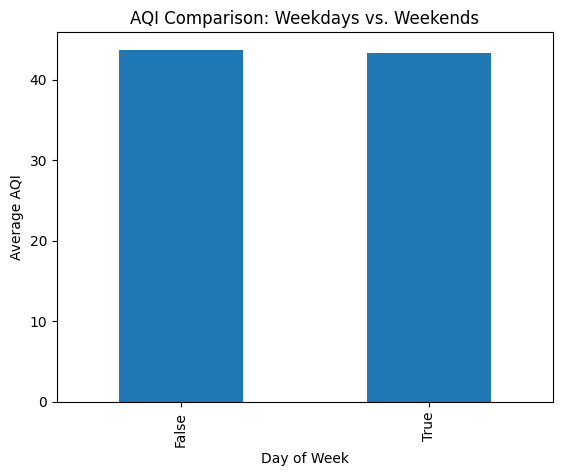

In [38]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the day of the week
df['DayOfWeek'] = df['Date'].dt.day_name()

# Group the data by weekdays and weekends and calculate the average AQI
grouped = df.groupby(df['DayOfWeek'].isin(['Saturday', 'Sunday']))['AQI'].mean()

# Plot the average AQI for weekdays and weekends
grouped.plot(kind='bar', xlabel='Day of Week', ylabel='Average AQI', title='AQI Comparison: Weekdays vs. Weekends')

# Display the plot
plt.show()

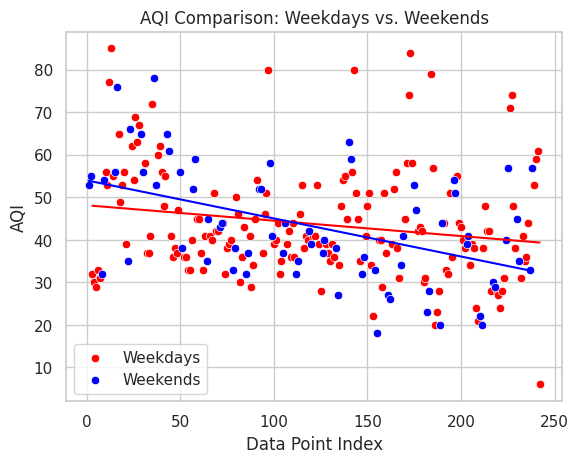

In [40]:
import seaborn as sns

# Reset the index to start at 1
df.reset_index(drop=True, inplace=True)
df.index = df.index + 1

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the day of the week
df['DayOfWeek'] = df['Date'].dt.day_name()

# Separate weekdays and weekends
weekdays = df[df['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekends = df[df['DayOfWeek'].isin(['Saturday', 'Sunday'])]

# Set the seaborn style
sns.set(style='whitegrid')

# Scatter plot for weekdays
sns.scatterplot(data=weekdays, x=weekdays.index, y='AQI', color='red', label='Weekdays')

# Scatter plot for weekends
sns.scatterplot(data=weekends, x=weekends.index, y='AQI', color='blue', label='Weekends')

# Line of best fit for weekdays
weekday_line = np.polyfit(weekdays.index, weekdays['AQI'], 1)
weekday_line_fn = np.poly1d(weekday_line)
plt.plot(weekdays.index, weekday_line_fn(weekdays.index), color='red')

# Line of best fit for weekends
weekend_line = np.polyfit(weekends.index, weekends['AQI'], 1)
weekend_line_fn = np.poly1d(weekend_line)
plt.plot(weekends.index, weekend_line_fn(weekends.index), color='blue')

# Set plot labels and title
plt.xlabel('Data Point Index')
plt.ylabel('AQI')
plt.title('AQI Comparison: Weekdays vs. Weekends')

# Display the legend
plt.legend()

# Display the plot
plt.show()